# Importing the libraries and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np


In [3]:
cols=["Bedrooms","Bathrooms","area","zipcode","price"]

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Houses-dataset-master/Houses-dataset-master/Houses Dataset/HousesInfo.txt" ,names=cols, sep=" ", header=None)
df

,Bedrooms,Bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


In [5]:
df.index=np.arange(1,len(df)+1)

Checking for the null values

In [6]:
sum(df.isnull().any())

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 1 to 535
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   535 non-null    int64  
 1   Bathrooms  535 non-null    float64
 2   area       535 non-null    int64  
 3   zipcode    535 non-null    int64  
 4   price      535 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 25.1 KB


Visualizing the dataset using seaborn library

In [8]:
import seaborn as sns

<Axes: xlabel='price'>

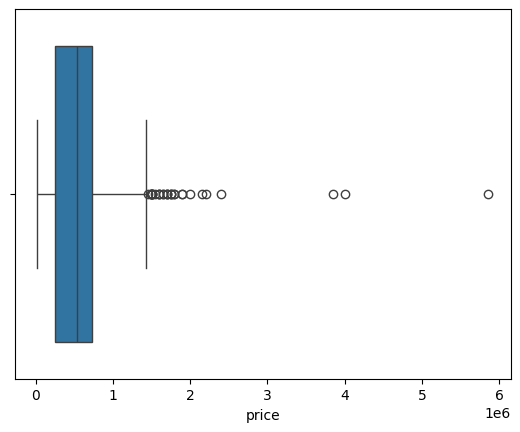

In [9]:
sns.boxplot(x=df['price'])

Removing the outliers i.e. price <100K and >900K

In [10]:
df=df[df['price']<900_000]
df

,Bedrooms,Bathrooms,area,zipcode,price
1,4,4.0,4053,85255,869500
2,4,3.0,3343,36372,865200
3,3,4.0,3923,85266,889000
7,3,4.0,2544,85262,799000
11,5,5.0,4829,85266,519200
...,...,...,...,...,...
531,5,2.0,2066,94531,399900
532,4,3.5,9536,94531,460000
533,3,2.0,2014,94531,407000
534,4,3.0,2312,94531,419000


In [11]:
df=df[df['price']>100_000]

<Axes: xlabel='price'>

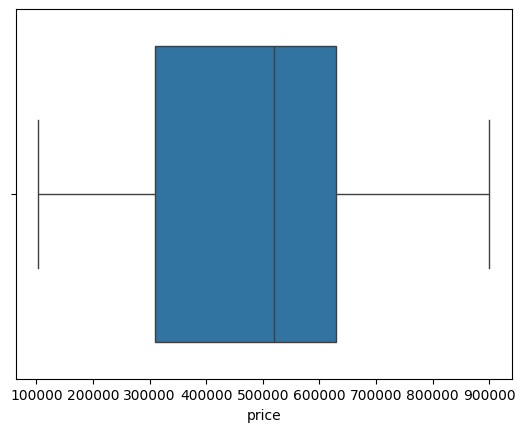

In [12]:
sns.boxplot(x=df['price'])

Making list of index values

In [13]:
index_values=list(df.index)

In [14]:
len(index_values)

405

## Handling Image dataset

In [15]:
import glob
import os

images=[]

for number in index_values:
    for path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Houses-dataset-master/Houses-dataset-master/Houses Dataset/" + str(number) + "_bathroom.jpg"):
        if os.path.isfile(path):
            images.append(path)

In [16]:
## Creating a dataframe for image dataset

In [17]:
df_img=pd.DataFrame(images,columns=['Bathroom'],index=index_values)

In [18]:
images_bedroom=[]
for number in index_values:
    for path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Houses-dataset-master/Houses-dataset-master/Houses Dataset/" + str(number) + "_bedroom.jpg"):
        if os.path.isfile(path):
            images_bedroom.append(path)

In [19]:
df_img['Bedroom']=images_bedroom

In [20]:
images_frontal=[]
for number in index_values:
    for path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Houses-dataset-master/Houses-dataset-master/Houses Dataset/" + str(number) + "_frontal.jpg"):
        if os.path.isfile(path):
            images_frontal.append(path)

In [21]:
df_img['Frontal']=images_frontal

In [22]:
images_kitchen=[]
for number in index_values:
    for path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Houses-dataset-master/Houses-dataset-master/Houses Dataset/" + str(number) + "_kitchen.jpg"):
        if os.path.isfile(path):
            images_kitchen.append(path)

In [23]:
df_img['Kitchen']=images_kitchen

In [25]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 1 to 535
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Bathroom  405 non-null    object
 1   Bedroom   405 non-null    object
 2   Frontal   405 non-null    object
 3   Kitchen   405 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


### Combining the four images into one

In [26]:
import cv2

df_images=[]
for row_index,row in df_img.iterrows():
            inputImages=[]
            outputImage = np.zeros((128, 128, 3), dtype="uint8")
            image_temp1 = cv2.imread(row.Bathroom)
            image1 = cv2.resize(image_temp1, (64 , 64))

            image_temp2 = cv2.imread(row.Bedroom)
            image2 = cv2.resize(image_temp2, (64 , 64))

            image_temp3 = cv2.imread(row.Frontal)
            image3 = cv2.resize(image_temp3, (64 , 64))

            image_temp4 = cv2.imread(row.Kitchen)
            image4 = cv2.resize(image_temp4, (64 , 64))

            inputImages.append(image1)
            inputImages.append(image2)
            inputImages.append(image3)
            inputImages.append(image4)

            outputImage[0:64, 0:64] = inputImages[0]
            outputImage[0:64, 64:128] = inputImages[1]
            outputImage[64:128, 64:128] = inputImages[2]
            outputImage[64:128, 0:64] = inputImages[3]


            df_images.append(outputImage)

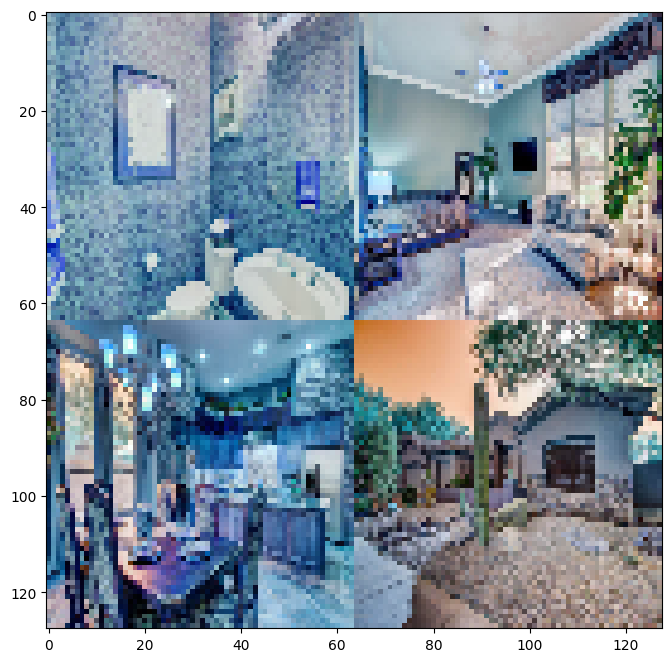

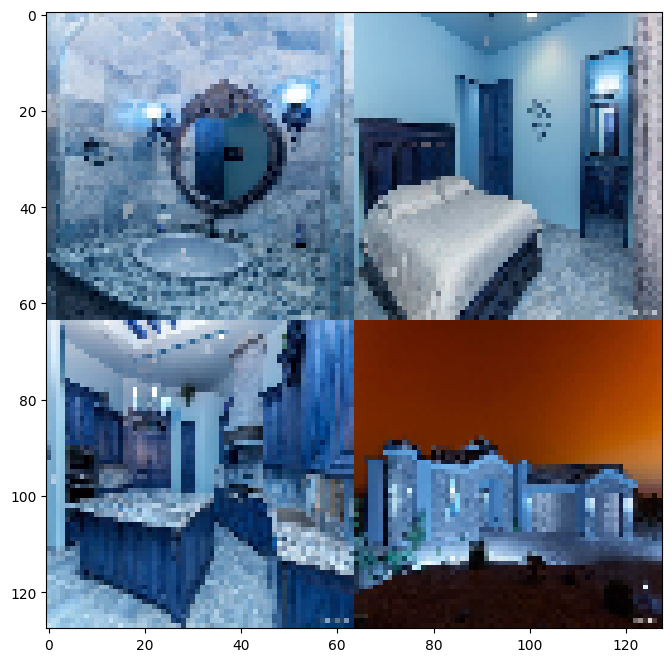

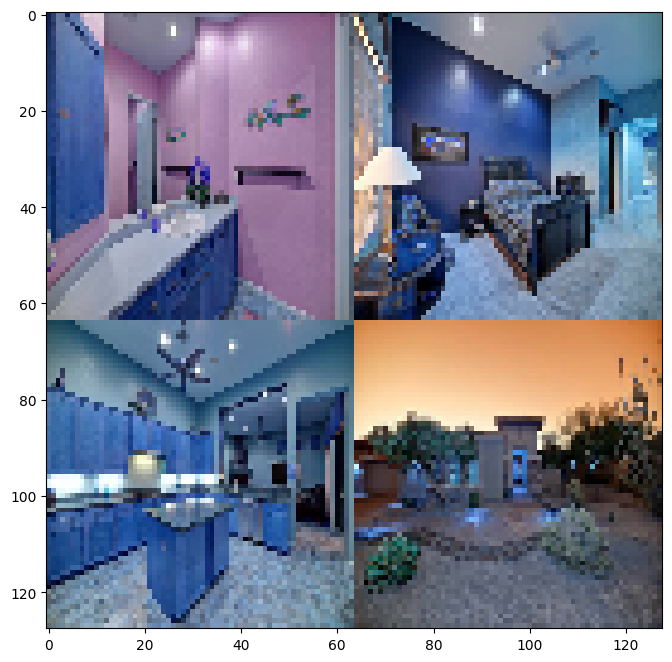

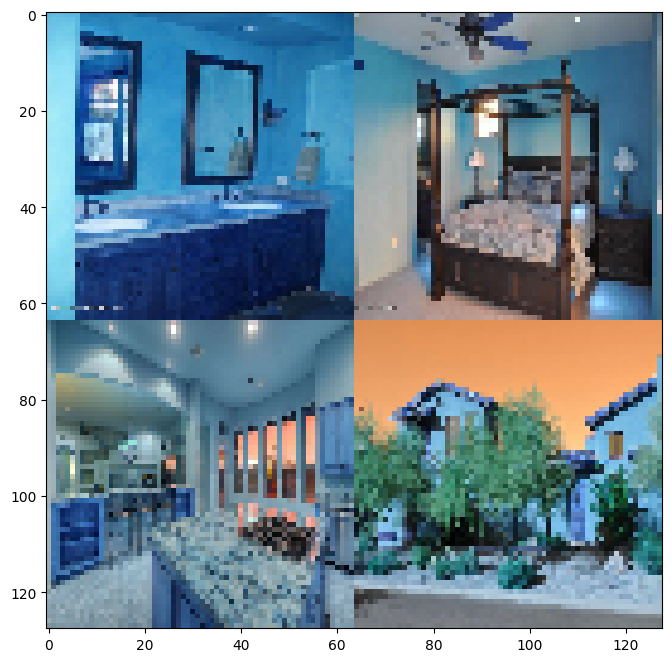

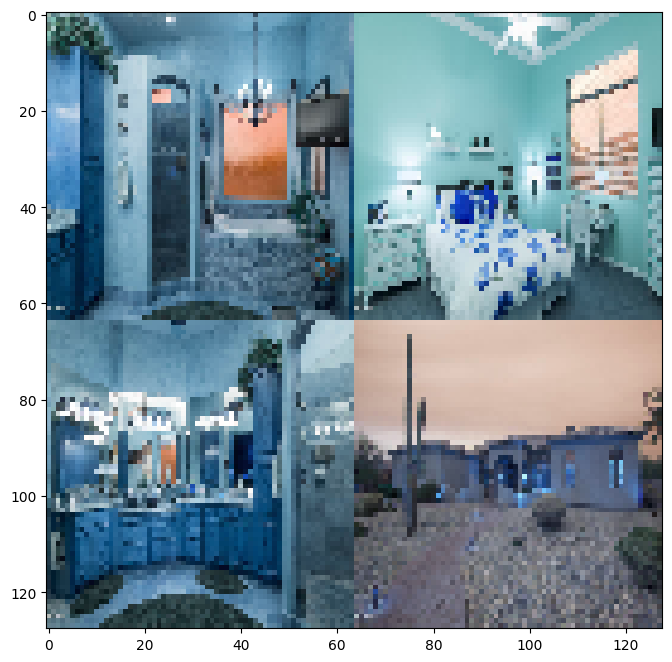

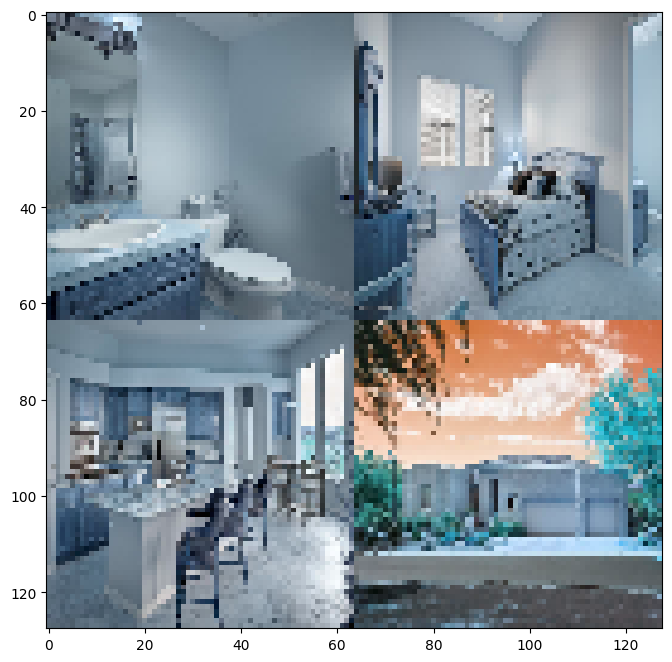

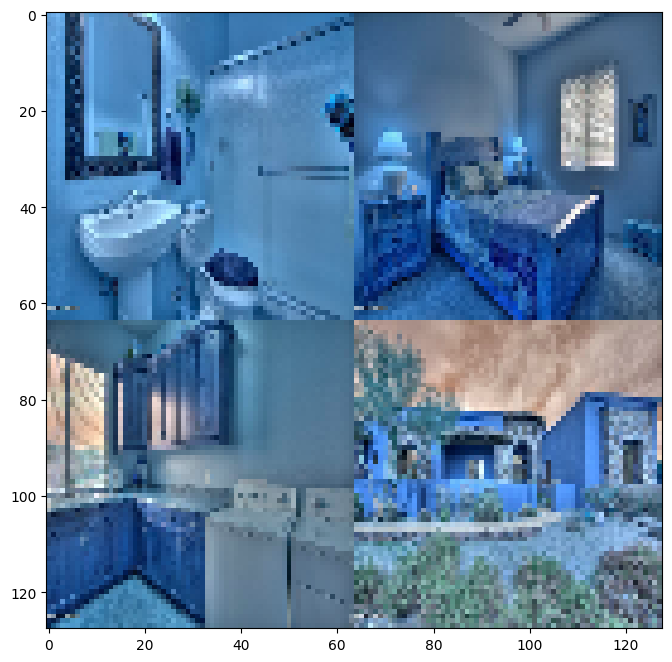

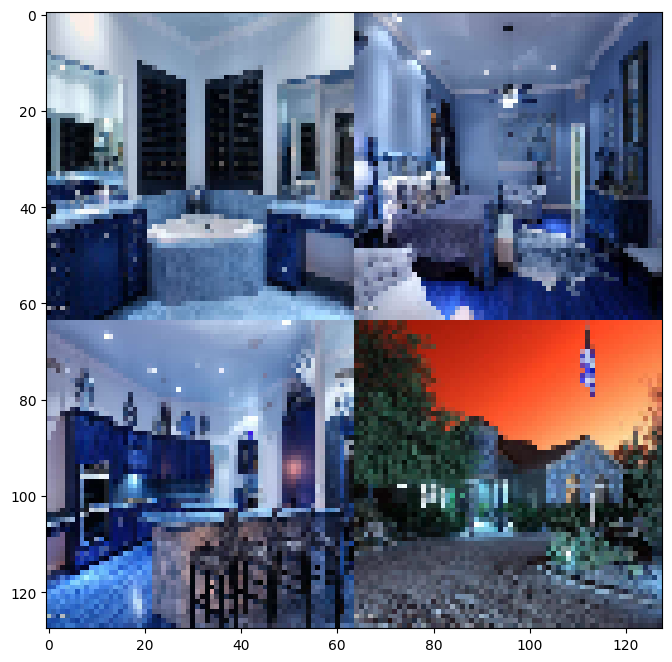

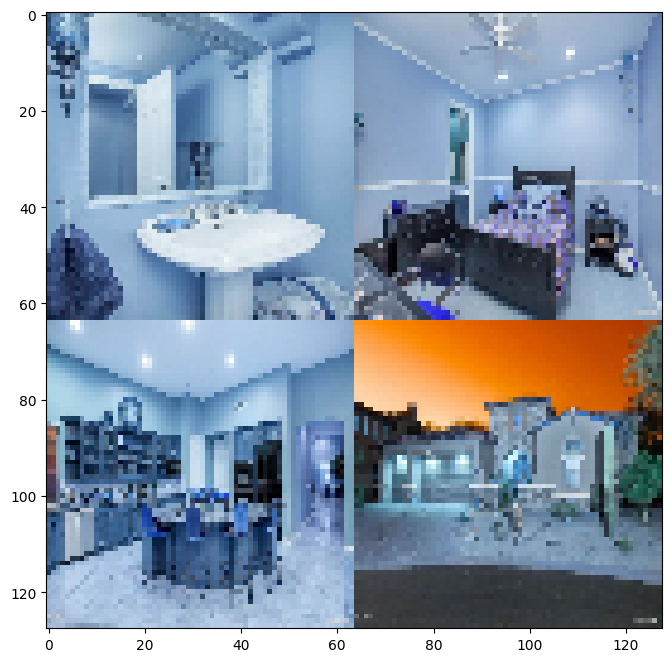

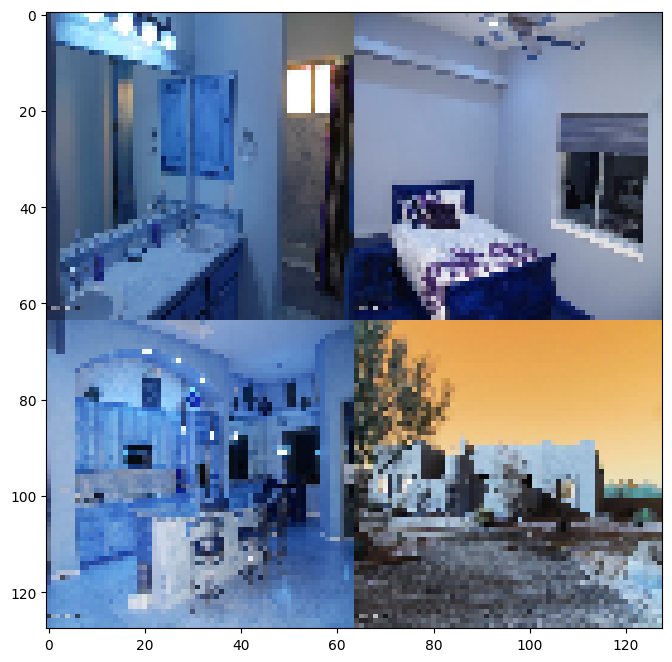

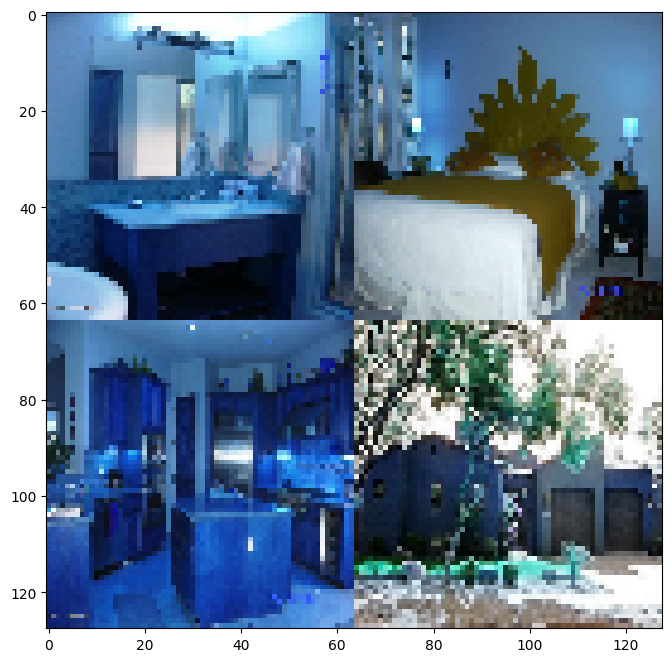

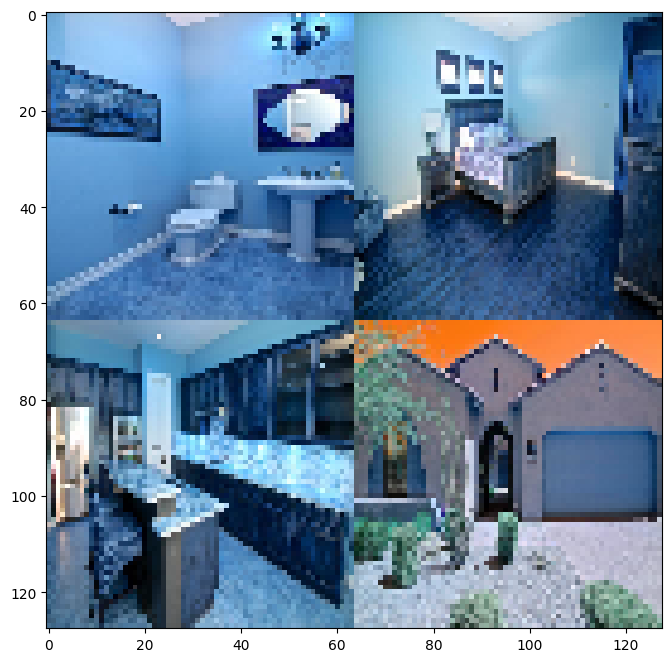

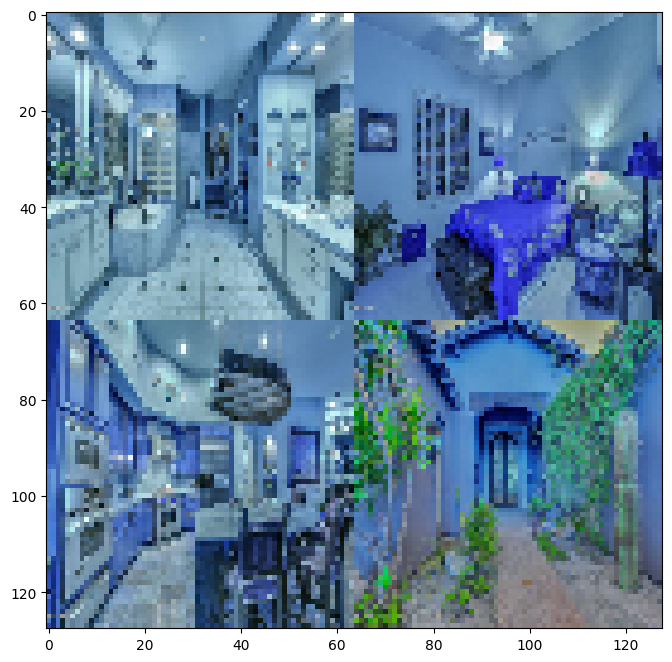

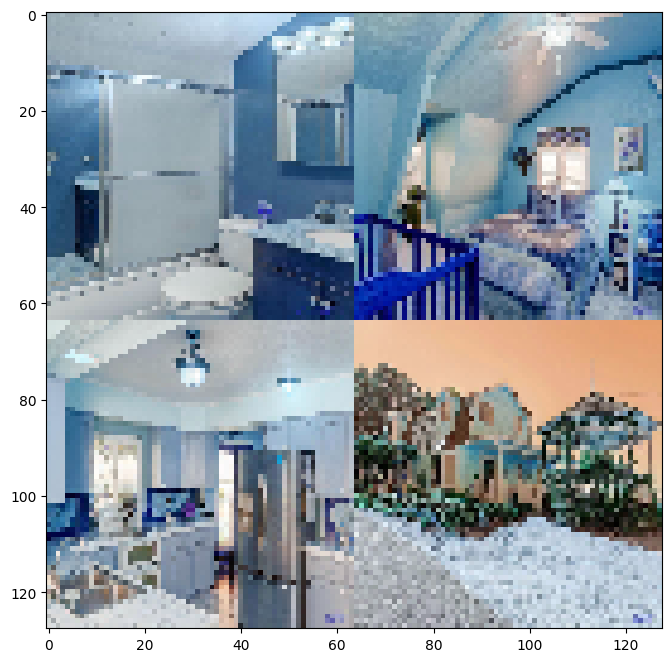

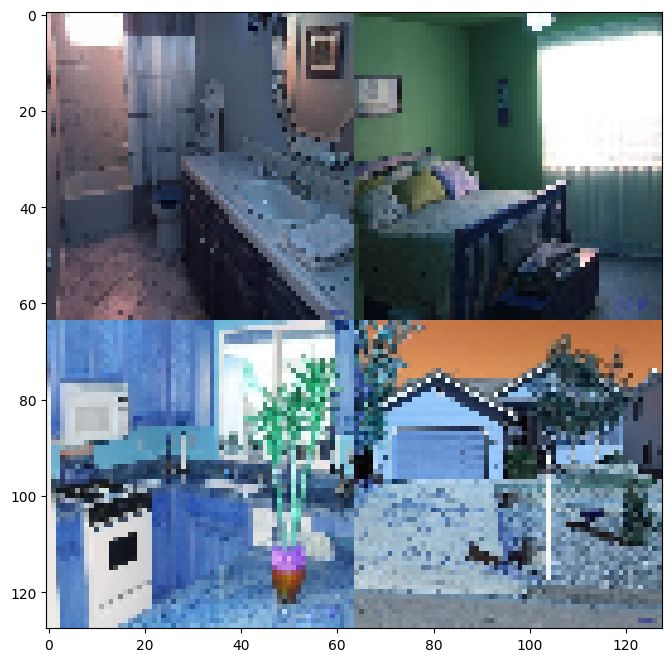

In [31]:
from matplotlib import pyplot as plt

number=15

for i in df_images[:number]:
    plt.figure(figsize=(8,8))
    plt.imshow(i, interpolation='nearest')
    plt.show()



In [ ]:
img_arr=np.asarray(df_images)

In [ ]:
img_arr.shape

(405, 128, 128, 3)

## Encoding categorical features and normalize numeric features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 1 to 535
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   405 non-null    int64  
 1   Bathrooms  405 non-null    float64
 2   area       405 non-null    int64  
 3   zipcode    405 non-null    int64  
 4   price      405 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.0 KB


In [ ]:
len(df.Bedrooms.unique())

9

In [ ]:
len(df.area.unique())

359

In [ ]:
len(df.zipcode.unique())

40

In [ ]:
len(df.Bathrooms.unique())

11

### If we convert area into categorical columns then there would 359 columns for area only, so normalizing it to numeric feature

In [ ]:
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low



In [ ]:
encode_numeric_range(df,'area')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [ ]:
encode_text_dummy(df,"Bathrooms")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
encode_text_dummy(df,"Bedrooms")
encode_text_dummy(df,"zipcode")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
img_arr=img_arr.astype('float32')

In [ ]:
img_arr/=255

In [ ]:
# Converting df to X and Y

In [ ]:
y=df['price']

In [ ]:
column_name=list(df.columns)
column_name.remove('price')


['area',
 'Bathrooms-1.0',
 'Bathrooms-1.5',
 'Bathrooms-2.0',
 'Bathrooms-2.5',
 'Bathrooms-3.0',
 'Bathrooms-3.25',
 'Bathrooms-3.5',
 'Bathrooms-4.0',
 'Bathrooms-4.5',
 'Bathrooms-5.0',
 'Bathrooms-6.0',
 'Bedrooms-1',
 'Bedrooms-2',
 'Bedrooms-3',
 'Bedrooms-4',
 'Bedrooms-5',
 'Bedrooms-6',
 'Bedrooms-7',
 'Bedrooms-8',
 'Bedrooms-10',
 'zipcode-36372',
 'zipcode-60002',
 'zipcode-60016',
 'zipcode-60046',
 'zipcode-62025',
 'zipcode-62034',
 'zipcode-62088',
 'zipcode-62214',
 'zipcode-62234',
 'zipcode-62249',
 'zipcode-81418',
 'zipcode-81521',
 'zipcode-81524',
 'zipcode-85255',
 'zipcode-85262',
 'zipcode-85266',
 'zipcode-85331',
 'zipcode-91752',
 'zipcode-91901',
 'zipcode-91915',
 'zipcode-92021',
 'zipcode-92253',
 'zipcode-92276',
 'zipcode-92543',
 'zipcode-92677',
 'zipcode-92692',
 'zipcode-92802',
 'zipcode-92880',
 'zipcode-93105',
 'zipcode-93111',
 'zipcode-93314',
 'zipcode-93446',
 'zipcode-93510',
 'zipcode-94501',
 'zipcode-94531',
 'zipcode-94565',
 'zipcod

In [ ]:
X=df[column_name]

### Splitting data into training and test dataset

In [ ]:
from sklearn.model_selection import train_test_split;


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)

x_img_train,x_img_test=train_test_split(img_arr,test_size=0.3,random_state=109)

In [ ]:
x_train.shape,x_test.shape

((283, 61), (122, 61))

In [ ]:
x_img_train.shape,x_img_test.shape

((283, 128, 128, 3), (122, 128, 128, 3))

# Creating the Model using Functional API

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Dense, Dropout



## Model 1: Fully Connected Nueral Network for text data.

In [ ]:
md1=Input(shape=x_train.shape[1:])
hidden1=Dense(61,activation='relu')(md1)
hidden2=Dense(30,activation='relu')(hidden1)
hidden3=Dense(10,activation='relu')(hidden2)
model_1=Dense(1,activation='relu')(hidden3)

## Model 2: CNN model for image dataset

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten


In [ ]:
x_img_train.shape[1:]

(128, 128, 3)

In [ ]:
md2=Input(shape=(x_img_train.shape[1:]))
Conv1=Conv2D(64,kernel_size=3,strides=(2,2),activation='relu')(md2)
pool1=MaxPooling2D(pool_size=(2, 2))(Conv1)

Conv2=Conv2D(64, (3, 3),strides=(2,2),padding='valid',activation='relu')(pool1)
pool2=MaxPooling2D(pool_size=(2, 2))(Conv2)
model_2=Flatten()(pool2)



### Prepare to concatenate both the functions using Tensorflows's functional API

In [ ]:
from tensorflow.keras.layers import concatenate

In [ ]:
concat=concatenate([model_2,model_1])

In [ ]:
hidden_1_concat=Dense(20,activation='relu')(concat)
output=Dense(1,activation='relu')(hidden_1_concat)




In [ ]:
model=Model(inputs=[md2,md1],outputs=output)

In [ ]:
print(model.summary())

Model: "model_30"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 63, 63, 64)   1792        input_43[0][0]                   
__________________________________________________________________________________________________
input_42 (InputLayer)           [(None, 61)]         0                                            
__________________________________________________________________________________________________
max_pooling2d_43 (MaxPooling2D) (None, 31, 31, 64)   0           conv2d_43[0][0]                  
___________________________________________________________________________________________

### Visualizing the 2 models

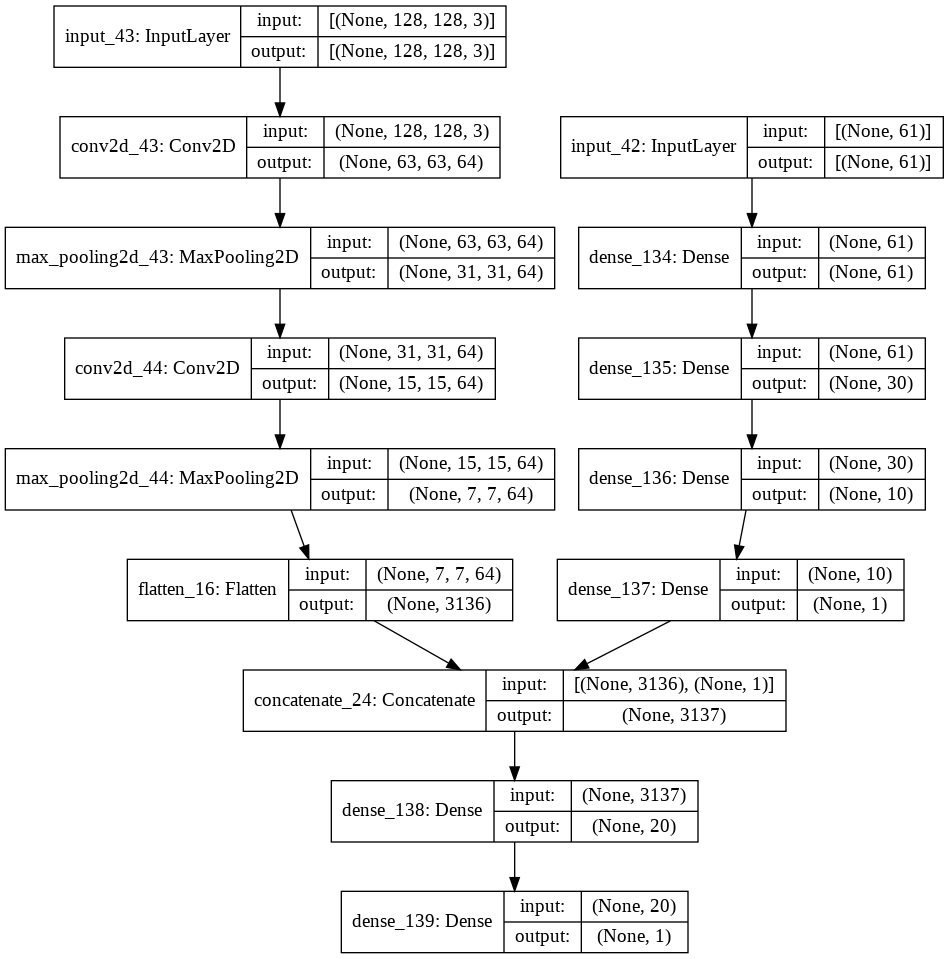

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/Proj_3.png', show_shapes=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/Proj_3.hdf5", verbose=2, save_best_only=True)

model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=12, verbose=2, mode='auto')
model.fit([x_img_train,x_train], y_train,batch_size=10,validation_data=([x_img_test,x_test], y_test),callbacks=[checkpointer,monitor],verbose=2,epochs=1000)




Epoch 1/1000
29/29 - 2s - loss: 280661983232.0000 - val_loss: 285756981248.0000

Epoch 00001: val_loss improved from inf to 285756981248.00000, saving model to /content/drive/MyDrive/Colab Notebooks/Proj_3.hdf5
Epoch 2/1000
29/29 - 0s - loss: 272977510400.0000 - val_loss: 262842433536.0000

Epoch 00002: val_loss improved from 285756981248.00000 to 262842433536.00000, saving model to /content/drive/MyDrive/Colab Notebooks/Proj_3.hdf5
Epoch 3/1000
29/29 - 0s - loss: 215590535168.0000 - val_loss: 153078136832.0000

Epoch 00003: val_loss improved from 262842433536.00000 to 153078136832.00000, saving model to /content/drive/MyDrive/Colab Notebooks/Proj_3.hdf5
Epoch 4/1000
29/29 - 0s - loss: 86435635200.0000 - val_loss: 48768950272.0000

Epoch 00004: val_loss improved from 153078136832.00000 to 48768950272.00000, saving model to /content/drive/MyDrive/Colab Notebooks/Proj_3.hdf5
Epoch 5/1000
29/29 - 0s - loss: 52626608128.0000 - val_loss: 49514041344.0000

Epoch 00005: val_loss did not impro

In [ ]:
### Load the saved model from the drive

model.load_weights("/content/drive/MyDrive/Colab Notebooks/Proj_3.hdf5")
pred=model.predict([x_img_test,x_test])

In [ ]:
from sklearn.metrics import mean_squared_error as mse

error=np.sqrt(mse(pred,y_test))
error

121519.92299295079

In [ ]:
 import matplotlib.pyplot as plt

def reg_chart_increasing_order(actual,predicted):
    df_chart=pd.DataFrame({'prediction':predicted.flatten(),'actual':actual.values.flatten()})
    df_chart.sort_values(by=['actual'],inplace=True)
    i = plt.plot(list(df_chart['actual']),label='actual_values')
    j = plt.plot(list(df_chart['prediction']),label='predicted_values')
    plt.legend()
    plt.show()



In [ ]:
y_test.shape,pred.shape

((122,), (122, 1))

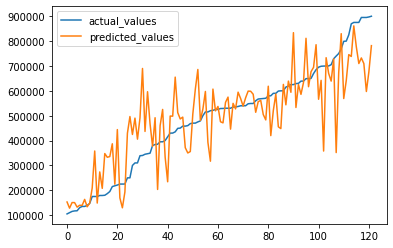

Root mean square error:  121519.92299295079


In [ ]:
reg_chart_increasing_order(y_test,pred)
print("Root mean square error: ",error)

### Importing VGG16 Model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
md2_add=Input(shape=x_train.shape[1:])
hd_add1=Dense(100,activation='relu')(md2_add)
hd_add2=Dense(70,activation='relu')(hd_add1)
hd_add3=Dense(25,activation='relu')(hd_add2)
hd_add4=Dense(5,activation='relu')(hd_add3)
md2_additional=Dense(1,activation='relu')(hd_add4)

In [ ]:
x_img_train.shape

(283, 128, 128, 3)

In [ ]:
md1_additional=VGG16(include_top=False, input_shape=(x_img_train.shape[1:]),weights='imagenet',pooling='avg')


### Adding custom layers to the VGG16 model

In [ ]:
from tensorflow.keras.layers import concatenate
concat_additional=concatenate([md1_additional.output,md2_additional]);

In [ ]:
comb_hidden1=Dense(20,activation='relu')(concat_additional)
comb_hidden2=Dense(10,activation='relu')(comb_hidden1)
comb_hidden3=Dense(5,activation='relu')(comb_hidden2)
output_add=Dense(1,activation='relu')(comb_hidden3)

In [ ]:
model_add=Model(inputs=[md1_additional.input,md2_add],outputs=output_add)
model_add.summary()

Model: "model_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_51 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 128, 128, 64) 1792        input_51[0][0]                   
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 128, 128, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 64, 64, 64)   0           block1_conv2[0][0]               
___________________________________________________________________________________________

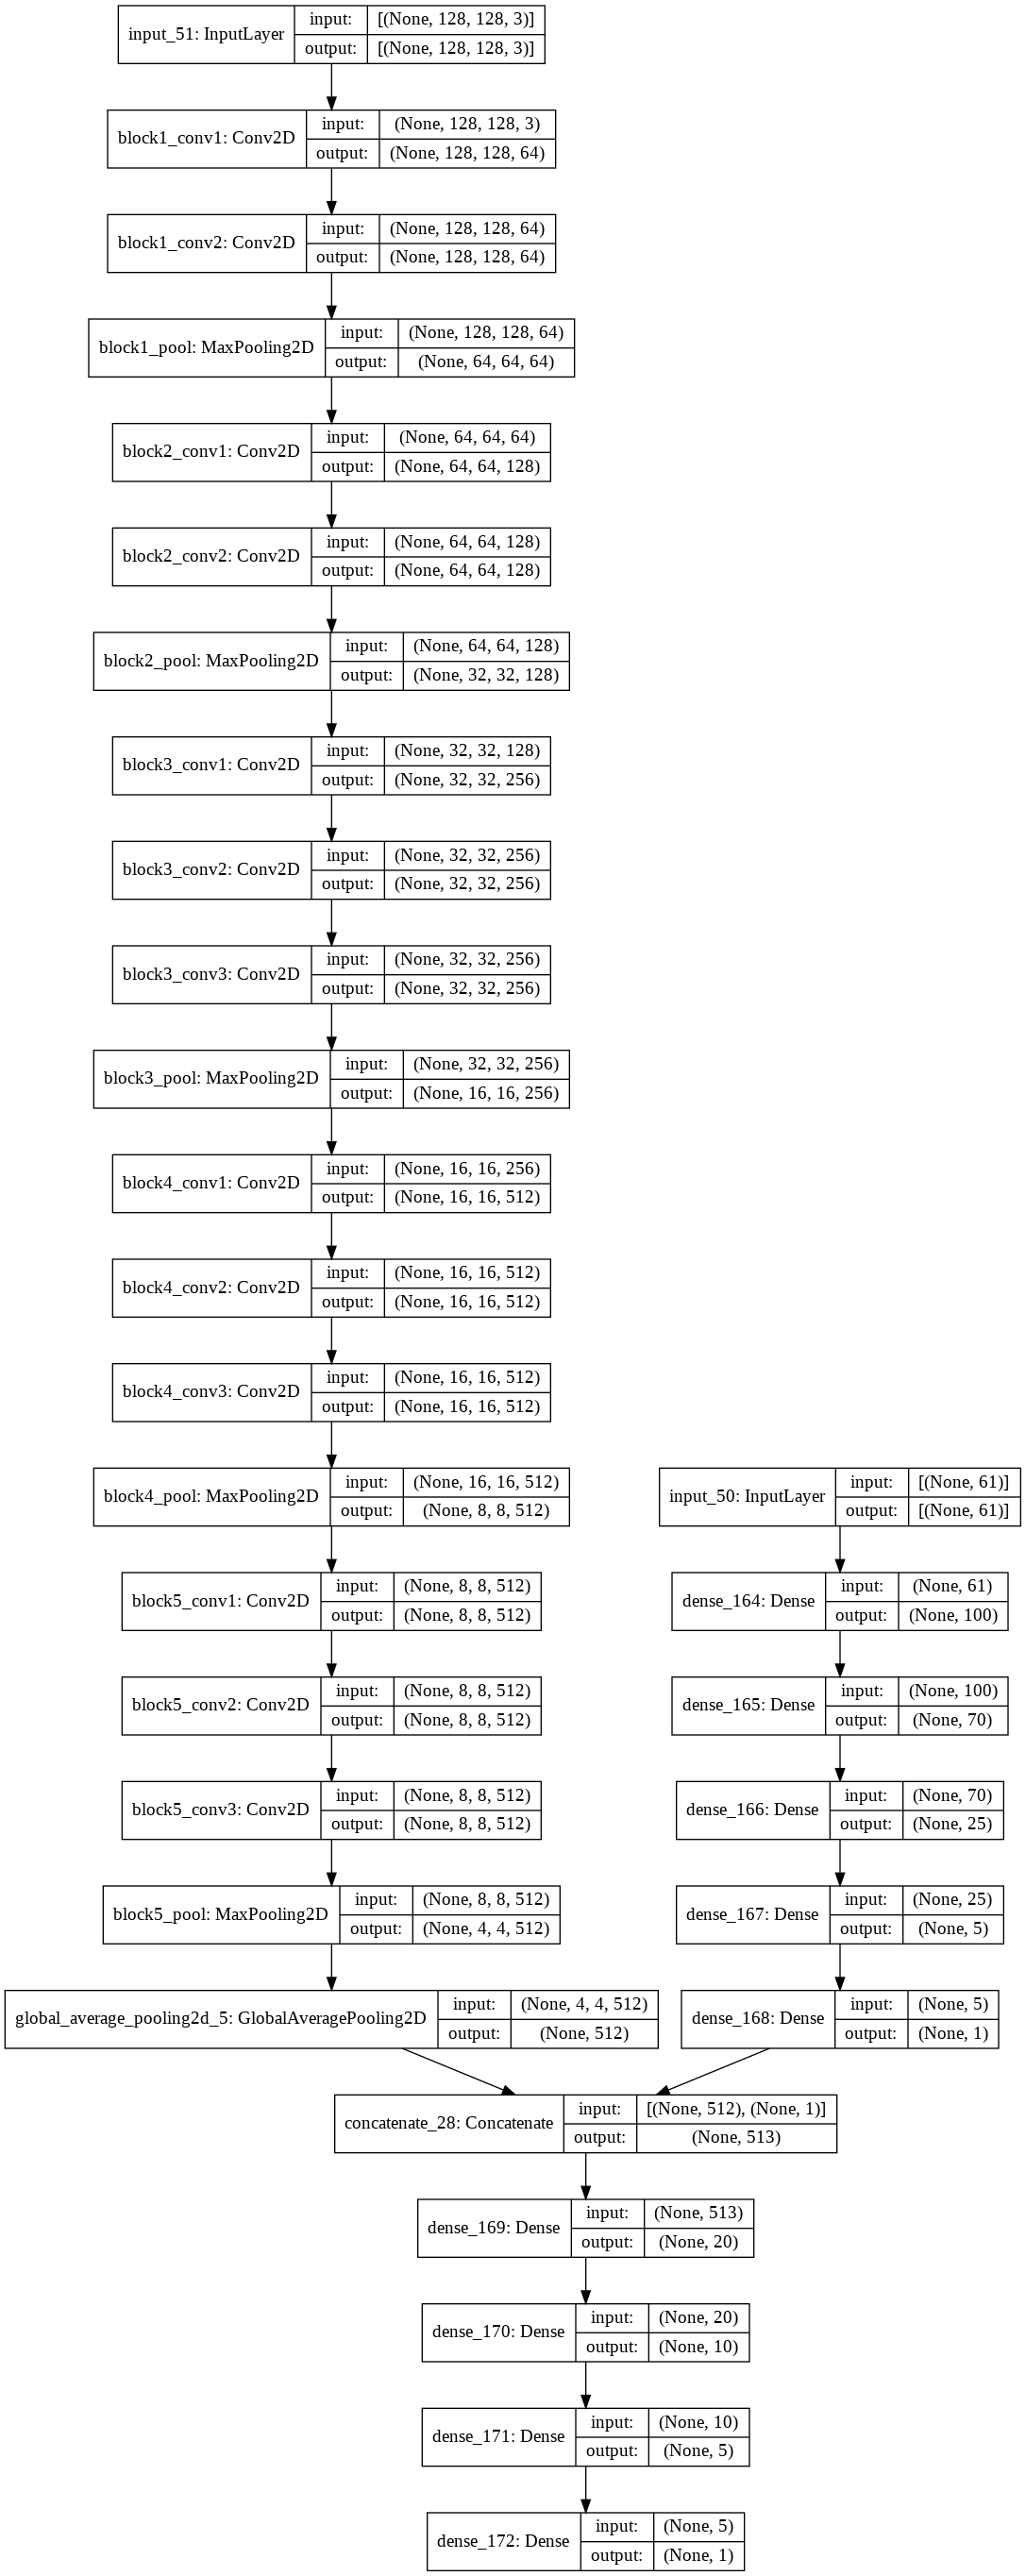

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_add, to_file='/content/drive/MyDrive/Colab Notebooks/VGG16_additional.png', show_shapes=True)

In [ ]:
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/Additional_1.hdf5", verbose=2, save_best_only=True)
model_add.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=12, verbose=2, mode='auto')
model_add.fit([x_img_train,x_train], y_train,batch_size=15,validation_data=([x_img_test,x_test], y_test),callbacks=[checkpointer,monitor],verbose=2,epochs=1000)

Epoch 1/1000
19/19 - 12s - loss: 143355576320.0000 - val_loss: 61253664768.0000

Epoch 00001: val_loss improved from inf to 61253664768.00000, saving model to /content/drive/MyDrive/Colab Notebooks/Additional_1.hdf5
Epoch 2/1000
19/19 - 3s - loss: 52621578240.0000 - val_loss: 45915873280.0000

Epoch 00002: val_loss improved from 61253664768.00000 to 45915873280.00000, saving model to /content/drive/MyDrive/Colab Notebooks/Additional_1.hdf5
Epoch 3/1000
19/19 - 3s - loss: 55094808576.0000 - val_loss: 54415638528.0000

Epoch 00003: val_loss did not improve from 45915873280.00000
Epoch 4/1000
19/19 - 3s - loss: 53391228928.0000 - val_loss: 46932373504.0000

Epoch 00004: val_loss did not improve from 45915873280.00000
Epoch 5/1000
19/19 - 3s - loss: 49758822400.0000 - val_loss: 69297668096.0000

Epoch 00005: val_loss did not improve from 45915873280.00000
Epoch 6/1000
19/19 - 3s - loss: 60811522048.0000 - val_loss: 52001185792.0000

Epoch 00006: val_loss did not improve from 45915873280.00

In [ ]:
model_add.load_weights("/content/drive/MyDrive/Colab Notebooks/Additional_1.hdf5")
pred_add=model_add.predict([x_img_test,x_test])

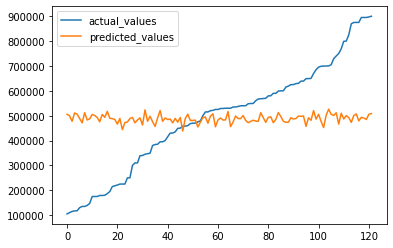

Root mean square error:  214279.8927332819


In [ ]:
rmse=np.sqrt(mse(pred_add,y_test))
reg_chart_increasing_order(y_test,pred_add)
print("Root mean square error: ",rmse)

## Treating zipcode as a separate input channel

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Houses-dataset-master/Houses-dataset-master/Houses Dataset/HousesInfo.txt" ,names=cols, sep=" ", header=None)
df

,Bedrooms,Bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


### Removing the outliers

In [ ]:
df=df[df['price']<900_000]
df=df[df['price']>100_000]
df.head()

,Bedrooms,Bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
6,3,4.0,2544,85262,799000
10,5,5.0,4829,85266,519200


In [ ]:
print(f"Unique values in zipcode column are : {len(df.zipcode.unique())}")

Unique values in zipcode column are : 40


In [ ]:
## Drop zipcode column
df.drop(columns=["zipcode"],axis=1,inplace=True)
#df_zipcode=df['zipcode']

In [ ]:
df.head()

,Bedrooms,Bathrooms,area,price
0,4,4.0,4053,869500
1,4,3.0,3343,865200
2,3,4.0,3923,889000
6,3,4.0,2544,799000
10,5,5.0,4829,519200


In [ ]:
encode_text_dummy(df,"Bedrooms")
encode_text_dummy(df,"Bathrooms")
encode_numeric_range(df,"area")

In [ ]:
column_name=list(df.columns)
column_name.remove('price')
column_name

['area',
 'Bedrooms-1',
 'Bedrooms-2',
 'Bedrooms-3',
 'Bedrooms-4',
 'Bedrooms-5',
 'Bedrooms-6',
 'Bedrooms-7',
 'Bedrooms-8',
 'Bedrooms-10',
 'Bathrooms-1.0',
 'Bathrooms-1.5',
 'Bathrooms-2.0',
 'Bathrooms-2.5',
 'Bathrooms-3.0',
 'Bathrooms-3.25',
 'Bathrooms-3.5',
 'Bathrooms-4.0',
 'Bathrooms-4.5',
 'Bathrooms-5.0',
 'Bathrooms-6.0']

In [ ]:
X_add=df[column_name]
y_add=df['price']

In [ ]:
x_train_add,x_test_add,y_train_add,y_test_add=train_test_split(X_add,y_add,test_size=0.3,random_state=27)

In [ ]:
x_train_add.shape,x_img_train.shape

((283, 21), (283, 128, 128, 3))

In [ ]:
md1_add_2=Input(shape=(x_img_train.shape[1:]))
Conv1_add=Conv2D(128,kernel_size=3,strides=(2,2),activation='relu')(md1_add_2)
pool1_add=MaxPooling2D(pool_size=(2, 2))(Conv1_add)

Conv2_add=Conv2D(64, (3, 3),strides=(2,2),padding='valid',activation='relu')(pool1_add)
pool2_add=MaxPooling2D(pool_size=(2, 2))(Conv2_add)

Conv3_add=Conv2D(64, (3, 3),strides=(2,2),padding='valid',activation='relu')(pool2_add)
pool3_add=MaxPooling2D(pool_size=(2, 2))(Conv3_add)
md1_additional_2=Flatten()(pool3_add)

In [ ]:
md2_add_2=Input(shape=x_test_add.shape[1:])
hd1_add_1=Dense(21,activation='relu')(md2_add_2)
hd2_add_2=Dense(15,activation='relu')(hd1_add_1)
hd3_add_3=Dense(10,activation='relu')(hd2_add_2)
md2_additional_2=Dense(1,activation='relu')(hd3_add_3)



In [ ]:
concat_add_2=concatenate([md1_additional_2,md2_additional_2])
hd_concat_2=Dense(16,activation='relu')(concat_add_2)
final_output=Dense(1,activation='relu')(hd_concat_2)

In [ ]:
final_model=Model(inputs=[md1_add_2,md2_add_2],outputs=final_output)

Model: "model_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 63, 63, 128)  3584        input_46[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_45 (MaxPooling2D) (None, 31, 31, 128)  0           conv2d_45[0][0]                  
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 15, 15, 64)   73792       max_pooling2d_45[0][0]           
___________________________________________________________________________________________

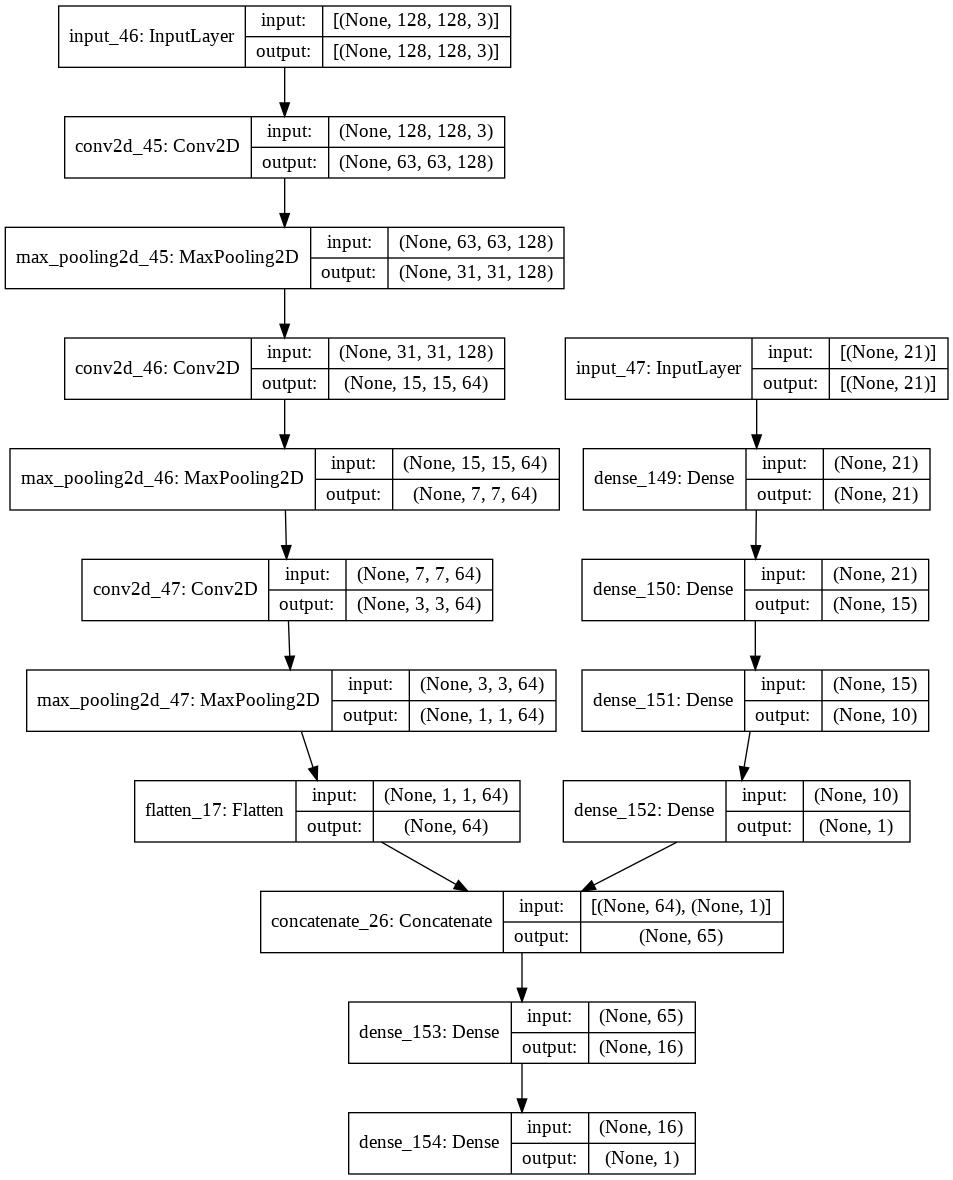

In [ ]:
final_model.summary()
plot_model(final_model, to_file='/content/drive/MyDrive/Colab Notebooks/Additional_2.png', show_shapes=True)

In [ ]:
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/Additional_2.hdf5", verbose=2, save_best_only=True)
final_model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=15, verbose=2, mode='auto')
final_model.fit([x_img_train,x_train_add], y_train_add,batch_size=12,validation_data=([x_img_test,x_test_add], y_test_add),callbacks=[checkpointer,monitor],verbose=2,epochs=1000)

Epoch 1/1000
24/24 - 1s - loss: 279766958080.0000 - val_loss: 288676741120.0000

Epoch 00001: val_loss improved from inf to 288676741120.00000, saving model to /content/drive/MyDrive/Colab Notebooks/Additional_2.hdf5
Epoch 2/1000
24/24 - 0s - loss: 276015120384.0000 - val_loss: 276665040896.0000

Epoch 00002: val_loss improved from 288676741120.00000 to 276665040896.00000, saving model to /content/drive/MyDrive/Colab Notebooks/Additional_2.hdf5
Epoch 3/1000
24/24 - 0s - loss: 242054578176.0000 - val_loss: 197884067840.0000

Epoch 00003: val_loss improved from 276665040896.00000 to 197884067840.00000, saving model to /content/drive/MyDrive/Colab Notebooks/Additional_2.hdf5
Epoch 4/1000
24/24 - 0s - loss: 114525470720.0000 - val_loss: 48129163264.0000

Epoch 00004: val_loss improved from 197884067840.00000 to 48129163264.00000, saving model to /content/drive/MyDrive/Colab Notebooks/Additional_2.hdf5
Epoch 5/1000
24/24 - 0s - loss: 50859499520.0000 - val_loss: 45780758528.0000

Epoch 0000

In [ ]:
final_model.load_weights("/content/drive/MyDrive/Colab Notebooks/Additional_2.hdf5")
pred_final=final_model.predict([x_img_test,x_test_add])

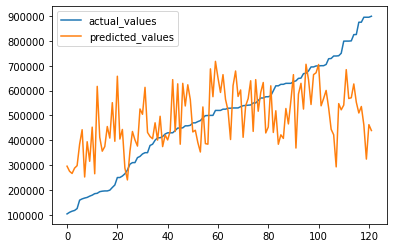

Root mean square error:  186530.23106137122


In [ ]:
rmse_final=np.sqrt(mse(pred_final,y_test_add))
reg_chart_increasing_order(y_test_add,pred_final)
print("Root mean square error: ",rmse_final)